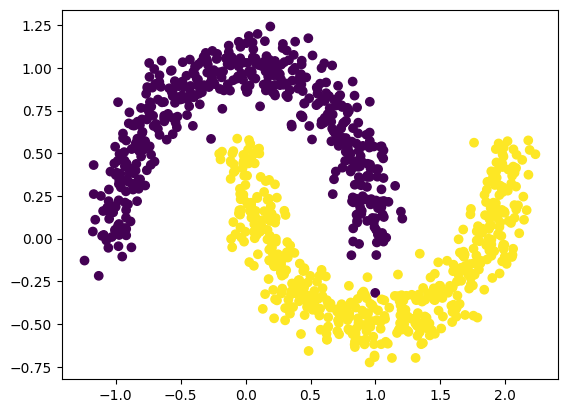

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label[:,None])
dataset['test_label'] = torch.from_numpy(test_label[:,None])

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])

In [10]:
y[0]

tensor([0])

In [2]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
Pauli_X = np.array([[0,1],[1,0]])
basis = np.identity(2)

#Basis functions for B-Splines
def cox_de_boor(x, degree, i,t):
    if degree == 0:
        return 1 if t[i] <= x < t[i+1] else 0
    else:
        coeff1 = (x-t[i])/(t[i+degree] - t[i]) if t[i+degree] != t[i] else 0
        coeff2 = (t[i+ degree +1] - x) / (t[i+degree+1] - t[i+1]) if t[i+degree+1] != t[i+1] else 0
    return coeff1* cox_de_boor(x, degree -1, i,t) + coeff2 * cox_de_boor(x,degree-1,i+1,t)

#generating knot vector for B-Spline basis
def generate_knot_vector_uniform(x, grid_points,control_points,degree):
    min_grid_points = degree + len(control_points) +1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0,2,grid_points)
    return knots

#Generating B-Splines
def Bspline(x,control_points, degree,grid):
    t = generate_knot_vector_uniform(x,grid,control_points,degree)
    return np.sum(p*cox_de_boor(x,degree,np.where(np.isclose(p,control_points))[0][0],t) for p in control_points)

#Rotation matrix along x-axis
def RotX(theta):
    return np.array([[np.cos(theta/2),-np.sin(theta/2)],[np.sin(theta/2),np.cos(theta/2)]])


def random_matrix(shape, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, shape)

def forward(x_in, degree, theta, control_points,grid):
    x_mid = np.zeros(x_in.shape)
    for i in range(len(x_in)):
        x_mid[i] += Bspline(x_in[i],control_points[i,:], degree,grid)
    return RotX(theta)@x_mid

def loss(x_out,y_pred,y_true,theta):
    delta_theta = 2*np.abs(1-y_pred)
    
def Proj(ProVec,TarVec):
    return ProVec.transpose()@TarVec

def deltaTheta(x_in,x_out):
    return 2*Proj(x_in[1],x_out)*Proj(x_in[1],Pauli_X@x_out)

def DeltaC(i,j,x_in,x_out):
    proVec = basis[:,j]
    return 2*Proj(ProVec=proVec,TarVec=x_out)*cox_de_boor(x_in[0][0],degree=2,i=i,t=generate_knot_vector_uniform(x_in[0][0],grid_points=5,control_points=control_points,degree=2))
    
def update(control_points,theta,learning_rate,x_in,x_out):
    theta -= learning_rate*deltaTheta(x_in,x_out)
    deltacij = np.zeros(control_points.shape)
    for i in range(len(control_points)):
        for j in range(basis.shape[0]):
            deltacij += DeltaC(i,j,x_in,x_out)
    control_points = control_points - learning_rate*deltacij
    return theta, control_points


learning_rate = 00.1

In [8]:
A[1][0]

array([-1.05667904, -0.05378083])

/tmp/ipykernel_26214/3532596721.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(p*cox_de_boor(x,degree,np.where(np.isclose(p,control_points))[0][0],t) for p in control_points)


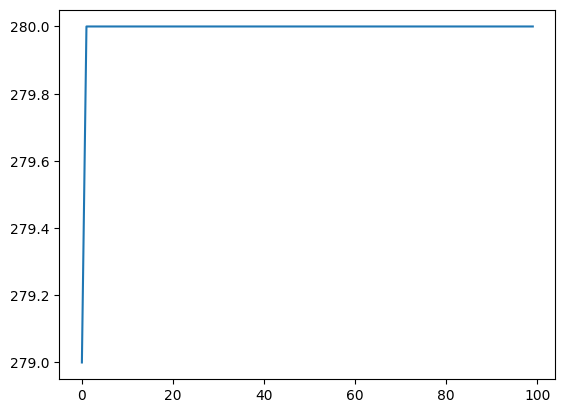

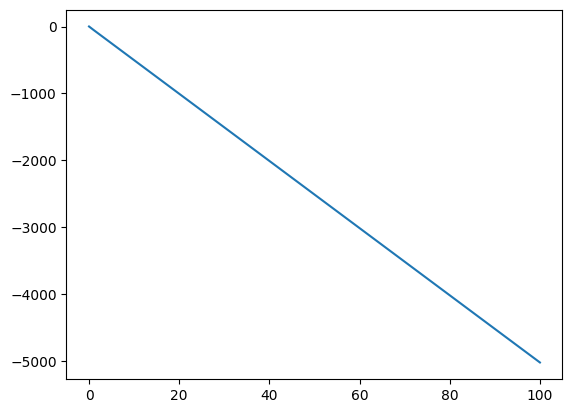

In [3]:
A =[]
res = []
listc= []
listcorrect = []
listwrong = []
list_epochs = []
list_theta = []
for i in range(0,X.shape[0]):
    A.append([np.array(X[i]),basis[int(y[i])]])
    


epochs = 100
theta = np.pi/2
list_theta.append(theta)
control_points = random_matrix(shape=(2,2), lower_bound=0, upper_bound=2)
for _ in range(epochs):
    for element in A:
        x_in = element
        x_out = np.abs(forward(x_in[0],degree=2,theta=theta,control_points=control_points,grid=5))
        if not np.isclose(np.linalg.norm(x_out),0):
            x_out = 1/np.linalg.norm(x_out) * x_out
        theta, control_points = update(control_points,theta,learning_rate,x_in,x_out)

    list_theta.append(theta)
    
    correct = 0
    wrong = 0
    for element in A:
        x_in = element 
        x_out = np.abs(forward(x_in[0],degree=2,theta=theta,control_points=control_points,grid=5))
        if not np.isclose(np.linalg.norm(x_out),0):
            x_out = 1/np.linalg.norm(x_out) * x_out
        Peter = Proj(x_in[1],x_out)
        if Peter >= 0.6:
            correct +=1
        else:
            wrong += 1
    listwrong.append(wrong)
    listcorrect.append(correct)
    list_epochs.append(_)
plt.plot(list_epochs,listcorrect)
plt.show()
plt.plot(list_theta)
        
    
    #if not np.isclose(np.linalg.norm(Peter),0):
    #    Peter = 1/np.linalg.norm(Peter)* Peter
    #print(Peter)

In [8]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
basis = np.identity(2)


def cox_de_boor(x, degree, i,t):
    if degree == 0:
        return 1 if t[i] <= x < t[i+1] else 0
    else:
        coeff1 = (x-t[i])/(t[i+degree] - t[i]) if t[i+degree] != t[i] else 0
        coeff2 = (t[i+ degree +1] - x) / (t[i+degree+1] - t[i+1]) if t[i+degree+1] != t[i+1] else 0
    return coeff1* cox_de_boor(x, degree -1, i,t) + coeff2 * cox_de_boor(x,degree-1,i+1,t)

def generate_knot_vector_uniform(x, grid_points,control_points,degree):
    min_grid_points = degree + len(control_points) +1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0,2,grid_points)
    return knots

def Bspline(x,control_points, degree,grid):
    t = generate_knot_vector_uniform(x,grid,control_points,degree)
    return np.sum([p*cox_de_boor(x,degree,np.where(np.isclose(p,control_points))[0][0],t) for p in control_points])

In [9]:
a = np.array(X[0])
control_points = random_matrix(shape=(2,2), lower_bound=0, upper_bound=2)
control_points2 = random_matrix((1,2), lower_bound=-2,upper_bound=2)
degree = 2
grid = 5

x_in = a
x_in[0]

-0.3883144967872904

In [10]:
def crossentropy(y_true,y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        return basis_sum

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_1 = nn.Parameter(torch.randn(10))  
        self.control_points_2 = nn.Parameter(torch.randn(10))  
        self.control_points_3 = nn.Parameter(torch.randn(10))
        
        self.bspline_layer_1 = BSplineLayer(self.control_points_1, degree, grid_points)
        self.bspline_layer_2 = BSplineLayer(self.control_points_2, degree, grid_points)
        self.bspline_layer_3 = BSplineLayer(self.control_points_3, degree, grid_points)

        # Output layer for classification (2 classes in this example)
        self.output_layer = nn.Linear(1, 2)  # Adjust input features as necessary

    def forward(self, x1, x2):
        y1 = self.bspline_layer_1(x1)
        y2 = self.bspline_layer_2(x2)
        y = y1 + y2
        bspline_output = self.bspline_layer_3(y)
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

degree = 3
grid_points = 14
model = KAN(degree, grid_points)

crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

x1 = torch.tensor([0.5, 1.5], dtype=torch.float32, requires_grad=True)
x2 = torch.tensor([1.0, 2.0], dtype=torch.float32, requires_grad=True)
target = torch.tensor([0, 1], dtype=torch.long)  # CrossEntropyLoss expects target as long dtype

# Forward pass
output = model(x1, x2)

# Compute loss
loss = crit(output, target)

# Backward pass and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()

# Print the results
print("Loss:", loss.item())
print("Output:", output)
print("Updated control points (layer 1):", model.control_points_1.data)
print("Updated control points (layer 2):", model.control_points_2.data)
print("Updated control points (layer 3):", model.control_points_3.data)


Loss: 0.7459638118743896
Output: tensor([[ 0.5507, -0.1051],
        [ 0.5507, -0.1051]], grad_fn=<AddmmBackward0>)
Updated control points (layer 1): tensor([-0.4220, -0.4720, -0.5038,  0.8228, -0.0350,  0.4222,  0.5597, -0.1441,
        -0.3784, -0.2521])
Updated control points (layer 2): tensor([ 0.6563, -0.5457, -0.3781,  0.7632, -0.9310,  1.6511, -0.8628,  0.1565,
         1.5537, -1.0676])
Updated control points (layer 3): tensor([ 1.6620, -1.1227, -0.6700,  2.1340, -1.1271, -0.3392, -0.2745,  2.3805,
        -1.9003,  0.1541])


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

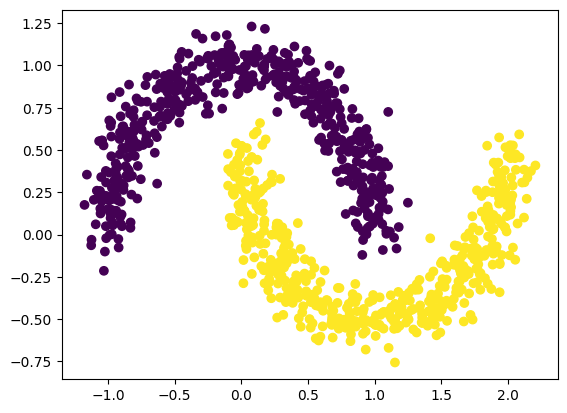

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        return basis_sum

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_1 = nn.Parameter(torch.randn(10, dtype=torch.float32))  
        self.control_points_2 = nn.Parameter(torch.randn(10, dtype=torch.float32))  
        self.control_points_3 = nn.Parameter(torch.randn(10, dtype=torch.float32))
        
        self.bspline_layer_1 = BSplineLayer(self.control_points_1, degree, grid_points)
        self.bspline_layer_2 = BSplineLayer(self.control_points_2, degree, grid_points)
        self.bspline_layer_3 = BSplineLayer(self.control_points_3, degree, grid_points)

        # Output layer for classification (2 classes in this example)
        self.output_layer = nn.Linear(1, 2)  # Adjust input features as necessary

    def forward(self, x1, x2):
        y1 = self.bspline_layer_1(x1)
        y2 = self.bspline_layer_2(x2)
        y = y1 + y2
        bspline_output = self.bspline_layer_3(y)
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

# Define the training process
def train_model(model, X, y, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        # Assuming X is of shape [num_samples, 2] and y is of shape [num_samples, 1]
        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()  # Flatten target to shape [num_samples]

        # Forward pass
        outputs = model(x1, x2)

        # Compute loss
        loss = criterion(outputs, target)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


#Import datasets
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label[:,None])
dataset['test_label'] = torch.from_numpy(test_label[:,None])

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
train_model(model, X, y, criterion, optimizer, num_epochs=100)

# Test the model
model.eval()
with torch.no_grad():
    x1 = X[:, 0]
    x2 = X[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    print('Predicted:', predicted)
    print('Actual:', y.squeeze())


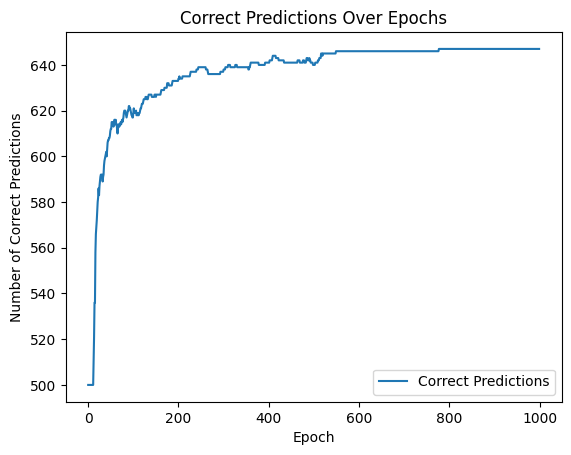

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        return basis_sum

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_1 = nn.Parameter(torch.randn(10, dtype=torch.float32))  
        self.control_points_2 = nn.Parameter(torch.randn(10, dtype=torch.float32))  
        self.control_points_3 = nn.Parameter(torch.randn(10, dtype=torch.float32))
        
        self.bspline_layer_1 = BSplineLayer(self.control_points_1, degree, grid_points)
        self.bspline_layer_2 = BSplineLayer(self.control_points_2, degree, grid_points)
        self.bspline_layer_3 = BSplineLayer(self.control_points_3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        y1 = self.bspline_layer_1(x1)
        y2 = self.bspline_layer_2(x2)
        y = y1 + y2
        bspline_output = self.bspline_layer_3(y)
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
            pass
    return correct_predictions

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png',dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    x1 = X[:, 0]
    x2 = X[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    #print('Predicted:', predicted)
    #print('Actual:', y.squeeze())


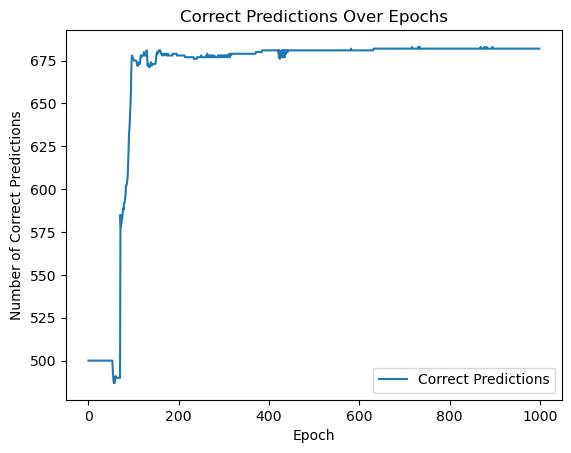

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    #min_grid_points = degree + len(control_points) + 1
    #if grid_points < min_grid_points:
    #    raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        return basis_sum

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(2)])  # 5 B-splines
        self.control_points_layer2 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline

        self.bspline_layers = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer2, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Combine inputs
        x = (x1 + x2) / 2
        
        # Pass through first layer (5 B-splines)
        y = sum([layer(x) for layer in self.bspline_layers])
        
        # Pass through second layer (1 B-spline)
        bspline_output = self.final_bspline_layer(y)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
            pass
    return correct_predictions

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    x1 = X[:, 0]
    x2 = X[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    #print('Predicted:', predicted)
    #print('Actual:', y.squeeze())


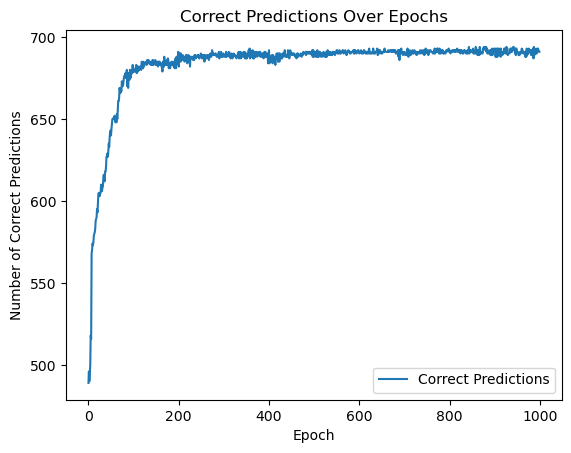

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        return basis_sum

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
            pass
    return correct_predictions

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    x1 = X[:, 0]
    x2 = X[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    #print('Predicted:', predicted)
    #print('Actual:', y.squeeze())


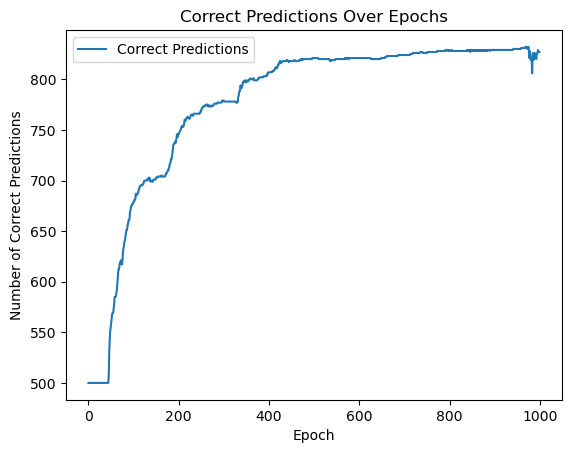

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_basis_sum = torch.sigmoid(self.scale_factor) * basis_sum  # Ensure scale factor is between 0 and 1
        return scaled_basis_sum

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
            pass
    return correct_predictions

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    x1 = X[:, 0]
    x2 = X[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    #print('Predicted:', predicted)
    #print('Actual:', y.squeeze())


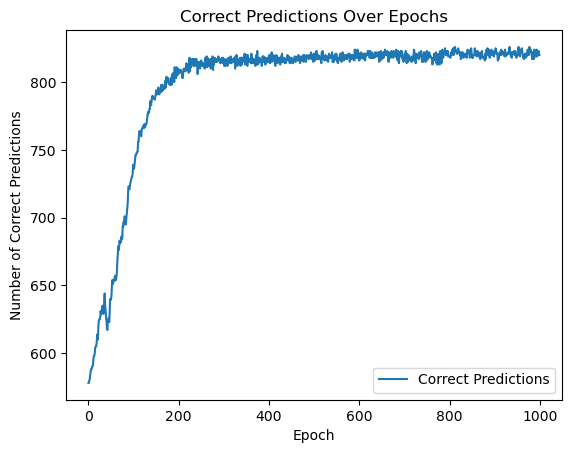

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = x#self.activation(x)
        output = torch.sigmoid(self.scale_factor) * scaled_input + torch.sigmoid(self.weight) * basis_sum  # Ensure scale factors are between 0 and 1
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
            pass
    return correct_predictions

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
#plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    x1 = X[:, 0]
    x2 = X[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    #print('Predicted:', predicted)
    #print('Actual:', y.squeeze())


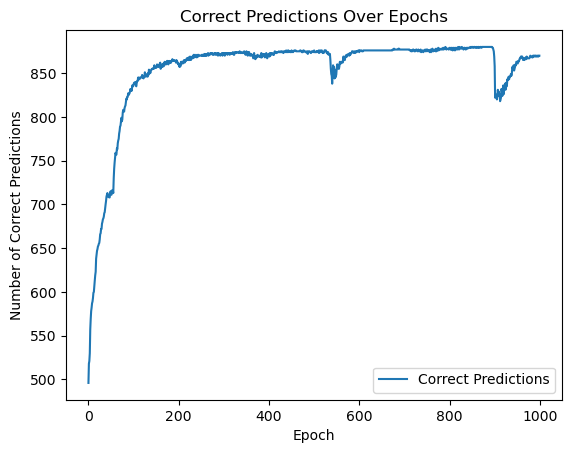

Accuracy: 74.40%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = torch.sigmoid(self.scale_factor) * scaled_input + torch.sigmoid(self.weight) * basis_sum  # Ensure scale factors are between 0 and 1
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
            pass
    return correct_predictions

def test_model(model, X, y):
    model.eval()
    with torch.no_grad():
        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        total = len(y)
        accuracy = correct / total

        print(f'Accuracy: {accuracy * 100:.2f}%')

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X_train = dataset['train_input']
y_train = dataset['train_label']
X_test = dataset['test_input']
y_test = dataset['test_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X_train, y_train, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Test the model
test_model(model, X_test, y_test)


Epoch [10/1000], Loss: 0.9743, Train Correct: 500/1000, Train Accuracy: 50.00%, Test Correct: 500/1000, Test Accuracy: 50.00%
Epoch [20/1000], Loss: 0.8810, Train Correct: 500/1000, Train Accuracy: 50.00%, Test Correct: 500/1000, Test Accuracy: 50.00%
Epoch [30/1000], Loss: 0.7932, Train Correct: 499/1000, Train Accuracy: 49.90%, Test Correct: 493/1000, Test Accuracy: 49.30%
Epoch [40/1000], Loss: 0.7237, Train Correct: 495/1000, Train Accuracy: 49.50%, Test Correct: 492/1000, Test Accuracy: 49.20%
Epoch [50/1000], Loss: 0.6627, Train Correct: 636/1000, Train Accuracy: 63.60%, Test Correct: 598/1000, Test Accuracy: 59.80%
Epoch [60/1000], Loss: 0.6168, Train Correct: 701/1000, Train Accuracy: 70.10%, Test Correct: 666/1000, Test Accuracy: 66.60%
Epoch [70/1000], Loss: 0.5738, Train Correct: 742/1000, Train Accuracy: 74.20%, Test Correct: 683/1000, Test Accuracy: 68.30%
Epoch [80/1000], Loss: 0.5348, Train Correct: 760/1000, Train Accuracy: 76.00%, Test Correct: 709/1000, Test Accuracy:

Epoch [660/1000], Loss: 0.2213, Train Correct: 906/1000, Train Accuracy: 90.60%, Test Correct: 767/1000, Test Accuracy: 76.70%
Epoch [670/1000], Loss: 0.2219, Train Correct: 903/1000, Train Accuracy: 90.30%, Test Correct: 762/1000, Test Accuracy: 76.20%
Epoch [680/1000], Loss: 0.2206, Train Correct: 906/1000, Train Accuracy: 90.60%, Test Correct: 764/1000, Test Accuracy: 76.40%
Epoch [690/1000], Loss: 0.2212, Train Correct: 908/1000, Train Accuracy: 90.80%, Test Correct: 764/1000, Test Accuracy: 76.40%
Epoch [700/1000], Loss: 0.2196, Train Correct: 907/1000, Train Accuracy: 90.70%, Test Correct: 766/1000, Test Accuracy: 76.60%
Epoch [710/1000], Loss: 0.2197, Train Correct: 906/1000, Train Accuracy: 90.60%, Test Correct: 765/1000, Test Accuracy: 76.50%
Epoch [720/1000], Loss: 0.2192, Train Correct: 904/1000, Train Accuracy: 90.40%, Test Correct: 767/1000, Test Accuracy: 76.70%
Epoch [730/1000], Loss: 0.2209, Train Correct: 906/1000, Train Accuracy: 90.60%, Test Correct: 762/1000, Test A

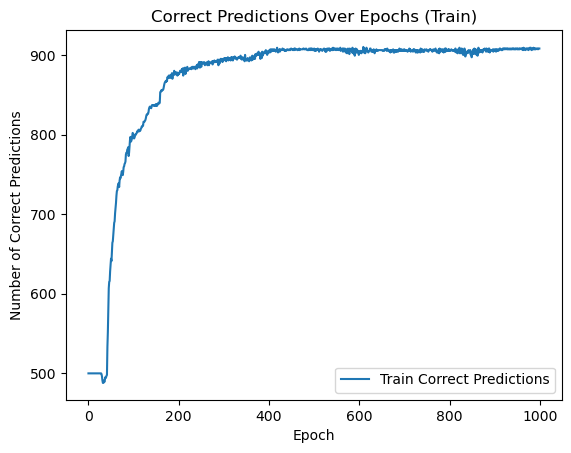

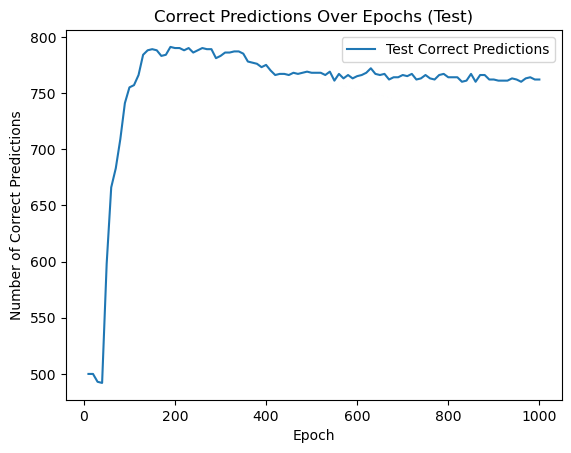

Final Test Correct Predictions: 762/1000, Final Test Accuracy: 76.20%


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = torch.sigmoid(self.scale_factor) * scaled_input + torch.sigmoid(self.weight) * basis_sum  # Ensure scale factors are between 0 and 1
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000):
    correct_predictions_train = []
    correct_predictions_test = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X_train[:, 0]
        x2 = X_train[:, 1]
        target_train = y_train.squeeze()

        outputs_train = model(x1, x2)
        loss = criterion(outputs_train, target_train)
        
        loss.backward()
        optimizer.step()
        
        _, predicted_train = torch.max(outputs_train, 1)
        correct_train = (predicted_train == target_train).sum().item()
        correct_predictions_train.append(correct_train)

        if (epoch+1) % 10 == 0:
            correct_test = test_model(model, X_test, y_test)
            correct_predictions_test.append(correct_test)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Correct: {correct_train}/{len(y_train)}, Train Accuracy: {correct_train / len(y_train) * 100:.2f}%, Test Correct: {correct_test}/{len(y_test)}, Test Accuracy: {correct_test / len(y_test) * 100:.2f}%')

    return correct_predictions_train, correct_predictions_test

def test_model(model, X, y):
    model.eval()
    with torch.no_grad():
        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        return correct

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X_train = dataset['train_input']
y_train = dataset['train_label']
X_test = dataset['test_input']
y_test = dataset['test_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions_train, correct_predictions_test = train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs for training data
plt.plot(correct_predictions_train, label='Train Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs (Train)')
plt.legend()
plt.savefig('correct_predictions_train_over_epochs.png', dpi=600)
plt.show()

# Plot the number of correct predictions over epochs for test data
plt.plot(range(10, 1001, 10), correct_predictions_test, label='Test Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs (Test)')
plt.legend()
plt.savefig('correct_predictions_test_over_epochs.png', dpi=600)
plt.show()

# Final test accuracy
final_test_correct = test_model(model, X_test, y_test)
final_test_accuracy = final_test_correct / len(y_test) * 100
print(f'Final Test Correct Predictions: {final_test_correct}/{len(y_test)}, Final Test Accuracy: {final_test_accuracy:.2f}%')


Epoch [10/1000], Loss: 0.6494, Train Correct: 500/1000, Train Accuracy: 50.00%, Test Loss: 0.6466, Test Correct: 568/1000, Test Accuracy: 56.80%
Epoch [20/1000], Loss: 0.5609, Train Correct: 672/1000, Train Accuracy: 67.20%, Test Loss: 0.5611, Test Correct: 685/1000, Test Accuracy: 68.50%
Epoch [30/1000], Loss: 0.4753, Train Correct: 762/1000, Train Accuracy: 76.20%, Test Loss: 0.4799, Test Correct: 783/1000, Test Accuracy: 78.30%
Epoch [40/1000], Loss: 0.3946, Train Correct: 844/1000, Train Accuracy: 84.40%, Test Loss: 0.4148, Test Correct: 817/1000, Test Accuracy: 81.70%
Epoch [50/1000], Loss: 0.3435, Train Correct: 848/1000, Train Accuracy: 84.80%, Test Loss: 0.3769, Test Correct: 819/1000, Test Accuracy: 81.90%
Epoch [60/1000], Loss: 0.3126, Train Correct: 859/1000, Train Accuracy: 85.90%, Test Loss: 0.3640, Test Correct: 819/1000, Test Accuracy: 81.90%
Epoch [70/1000], Loss: 0.2816, Train Correct: 853/1000, Train Accuracy: 85.30%, Test Loss: 0.3341, Test Correct: 824/1000, Test Ac

Epoch [580/1000], Loss: 0.0790, Train Correct: 973/1000, Train Accuracy: 97.30%, Test Loss: 0.4119, Test Correct: 926/1000, Test Accuracy: 92.60%
Epoch [590/1000], Loss: 0.0745, Train Correct: 975/1000, Train Accuracy: 97.50%, Test Loss: 0.4177, Test Correct: 927/1000, Test Accuracy: 92.70%
Epoch [600/1000], Loss: 0.0723, Train Correct: 975/1000, Train Accuracy: 97.50%, Test Loss: 0.4248, Test Correct: 923/1000, Test Accuracy: 92.30%
Epoch [610/1000], Loss: 0.0709, Train Correct: 977/1000, Train Accuracy: 97.70%, Test Loss: 0.4294, Test Correct: 926/1000, Test Accuracy: 92.60%
Epoch [620/1000], Loss: 0.0696, Train Correct: 977/1000, Train Accuracy: 97.70%, Test Loss: 0.4485, Test Correct: 928/1000, Test Accuracy: 92.80%
Epoch [630/1000], Loss: 0.0685, Train Correct: 977/1000, Train Accuracy: 97.70%, Test Loss: 0.4657, Test Correct: 929/1000, Test Accuracy: 92.90%
Epoch [640/1000], Loss: 0.0630, Train Correct: 979/1000, Train Accuracy: 97.90%, Test Loss: 0.4775, Test Correct: 930/1000, 

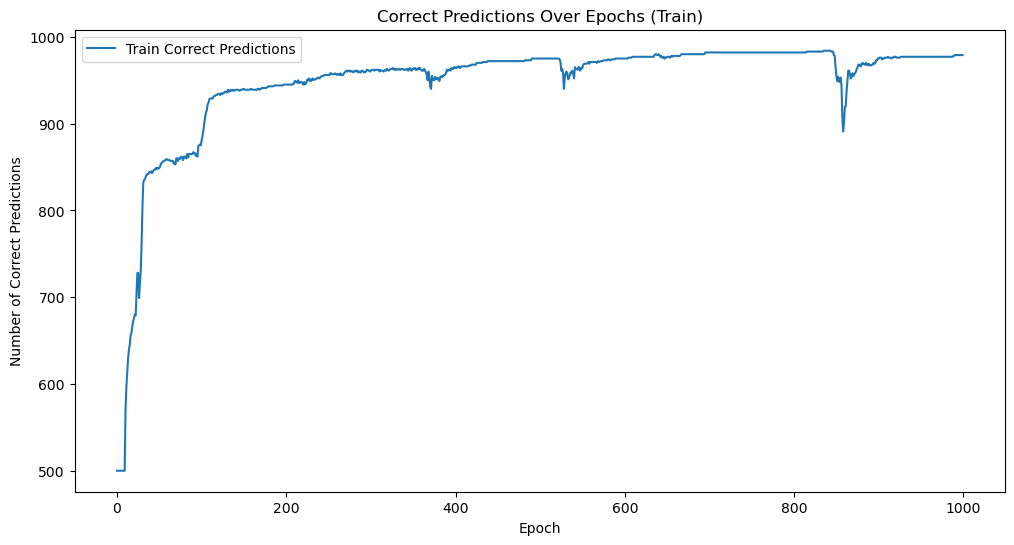

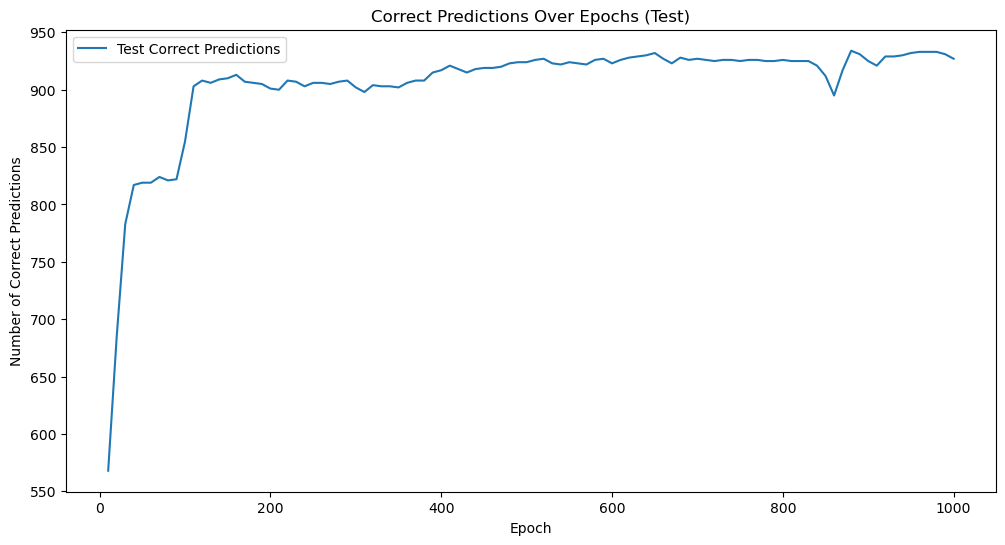

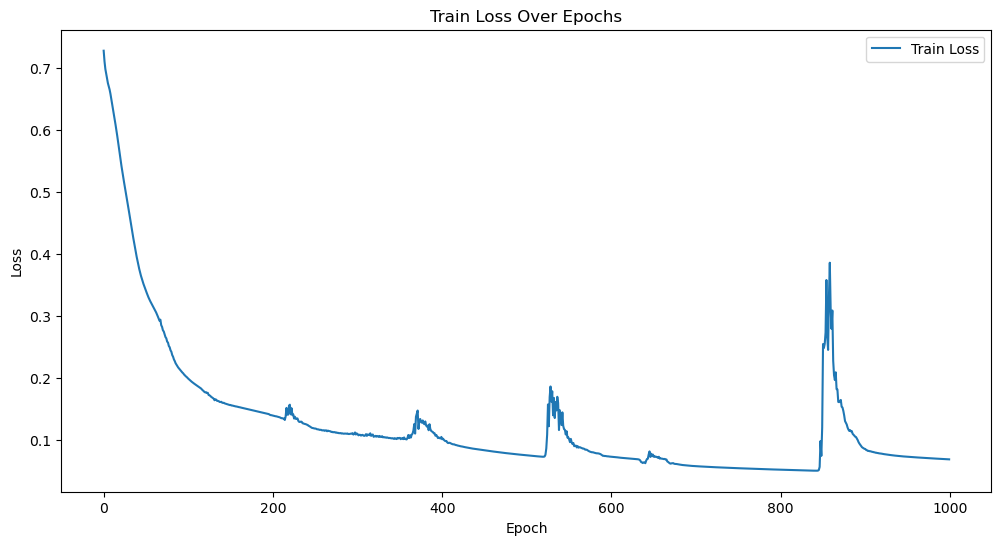

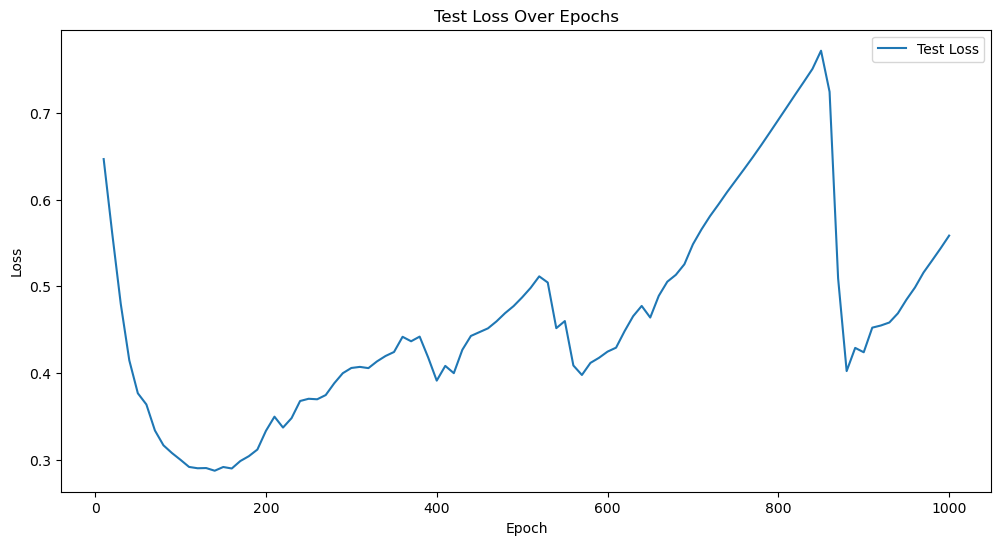

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = self.scale_factor * scaled_input + self.weight * basis_sum  # Use w and w_s without sigmoid constraints
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.empty(10).uniform_(-1, 1))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000):
    correct_predictions_train = []
    correct_predictions_test = []
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X_train[:, 0]
        x2 = X_train[:, 1]
        target_train = y_train.squeeze()

        outputs_train = model(x1, x2)
        loss_train = criterion(outputs_train, target_train)
        
        loss_train.backward()
        optimizer.step()
        
        _, predicted_train = torch.max(outputs_train, 1)
        correct_train = (predicted_train == target_train).sum().item()
        correct_predictions_train.append(correct_train)
        train_losses.append(loss_train.item())

        if (epoch+1) % 10 == 0:
            loss_test, correct_test = test_model(model, X_test, y_test, criterion)
            correct_predictions_test.append(correct_test)
            test_losses.append(loss_test)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_train.item():.4f}, Train Correct: {correct_train}/{len(y_train)}, Train Accuracy: {correct_train / len(y_train) * 100:.2f}%, Test Loss: {loss_test:.4f}, Test Correct: {correct_test}/{len(y_test)}, Test Accuracy: {correct_test / len(y_test) * 100:.2f}%')

    return correct_predictions_train, correct_predictions_test, train_losses, test_losses

def test_model(model, X, y, criterion):
    model.eval()
    with torch.no_grad():
        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        return loss.item(), correct

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X_train = dataset['train_input']
y_train = dataset['train_label']
X_test = dataset['test_input']
y_test = dataset['test_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions_train, correct_predictions_test, train_losses, test_losses = train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs for training data
plt.figure(figsize=(12, 6))
plt.plot(correct_predictions_train, label='Train Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs (Train)')
plt.legend()
plt.savefig('correct_predictions_train_over_epochs.png', dpi=600)
plt.show()

# Plot the number of correct predictions over epochs for test data
plt.figure(figsize=(12, 6))
plt.plot(range(10, 1001, 10), correct_predictions_test, label='Test Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs (Test)')
plt.legend()
plt.savefig('correct_predictions_test_over_epochs.png', dpi=600)
plt.show()

# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()
plt.savefig('train_loss_over_epochs.png', dpi=600)
plt.show()

# Plot the test loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(range(10, 1001, 10), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss Over Epochs')
plt.legend()
plt.savefig('test_loss_over_epochs.png', dpi=600)
plt.show()


Epoch [10/1000], Loss: 0.7058, Train Correct: 500/1000, Train Accuracy: 50.00%, Test Loss: 0.7042, Test Correct: 500/1000, Test Accuracy: 50.00%
Epoch [20/1000], Loss: 0.6938, Train Correct: 500/1000, Train Accuracy: 50.00%, Test Loss: 0.6933, Test Correct: 500/1000, Test Accuracy: 50.00%
Epoch [30/1000], Loss: 0.6808, Train Correct: 704/1000, Train Accuracy: 70.40%, Test Loss: 0.6801, Test Correct: 693/1000, Test Accuracy: 69.30%
Epoch [40/1000], Loss: 0.6485, Train Correct: 612/1000, Train Accuracy: 61.20%, Test Loss: 0.6531, Test Correct: 576/1000, Test Accuracy: 57.60%
Epoch [50/1000], Loss: 0.5787, Train Correct: 810/1000, Train Accuracy: 81.00%, Test Loss: 0.5937, Test Correct: 755/1000, Test Accuracy: 75.50%
Epoch [60/1000], Loss: 0.4754, Train Correct: 859/1000, Train Accuracy: 85.90%, Test Loss: 0.5222, Test Correct: 800/1000, Test Accuracy: 80.00%
Epoch [70/1000], Loss: 0.3780, Train Correct: 885/1000, Train Accuracy: 88.50%, Test Loss: 0.4674, Test Correct: 818/1000, Test Ac

Epoch [580/1000], Loss: 0.0729, Train Correct: 981/1000, Train Accuracy: 98.10%, Test Loss: 0.7361, Test Correct: 882/1000, Test Accuracy: 88.20%
Epoch [590/1000], Loss: 0.0720, Train Correct: 983/1000, Train Accuracy: 98.30%, Test Loss: 0.7509, Test Correct: 883/1000, Test Accuracy: 88.30%
Epoch [600/1000], Loss: 0.0711, Train Correct: 983/1000, Train Accuracy: 98.30%, Test Loss: 0.7619, Test Correct: 883/1000, Test Accuracy: 88.30%
Epoch [610/1000], Loss: 0.0704, Train Correct: 983/1000, Train Accuracy: 98.30%, Test Loss: 0.7698, Test Correct: 881/1000, Test Accuracy: 88.10%
Epoch [620/1000], Loss: 0.0697, Train Correct: 984/1000, Train Accuracy: 98.40%, Test Loss: 0.7762, Test Correct: 880/1000, Test Accuracy: 88.00%
Epoch [630/1000], Loss: 0.0690, Train Correct: 984/1000, Train Accuracy: 98.40%, Test Loss: 0.7825, Test Correct: 878/1000, Test Accuracy: 87.80%
Epoch [640/1000], Loss: 0.0683, Train Correct: 984/1000, Train Accuracy: 98.40%, Test Loss: 0.7895, Test Correct: 877/1000, 

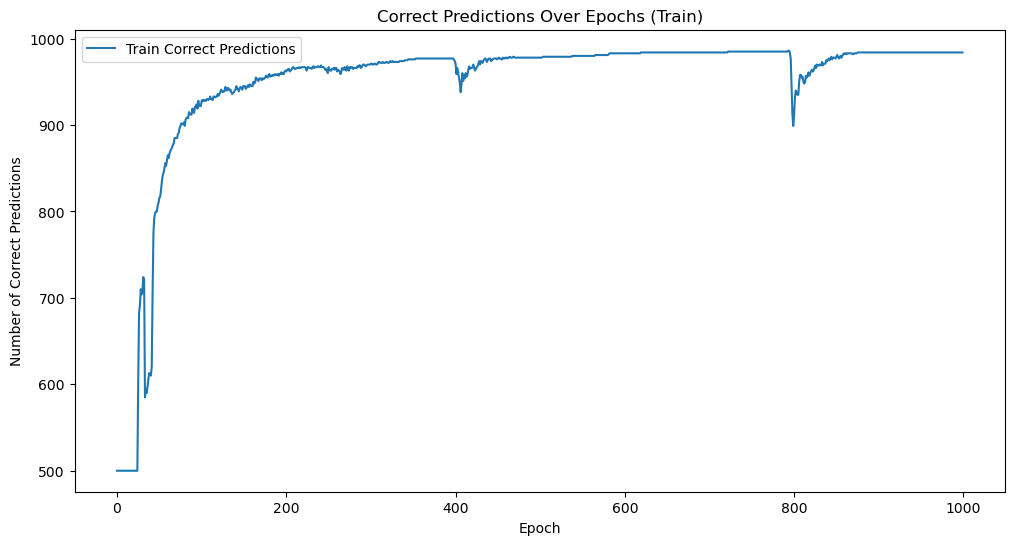

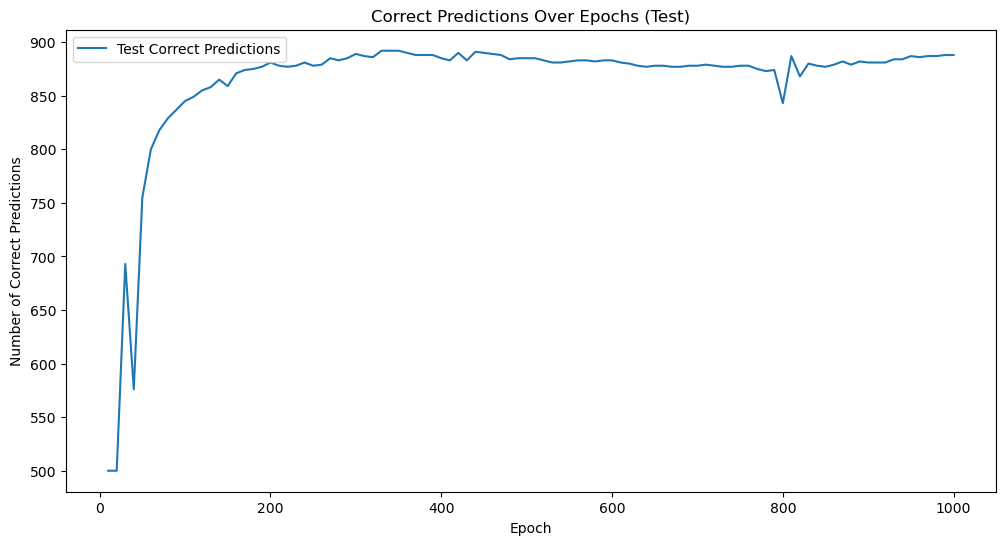

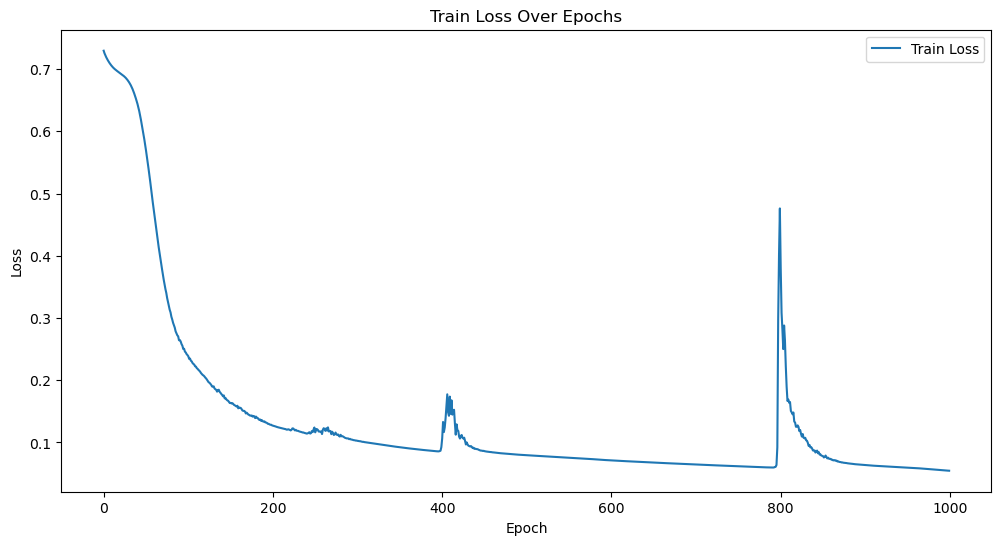

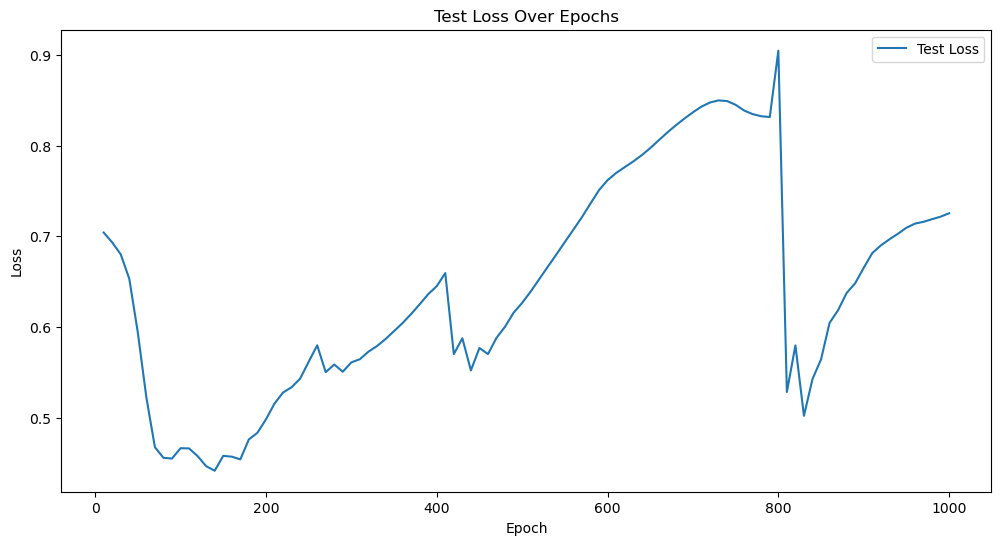

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = self.scale_factor * scaled_input + self.weight * basis_sum  # Use w and w_s without sigmoid constraints
        return output

    def plot_bspline(self, ax, x):
        with torch.no_grad():
            y = self.forward(x)
            ax.plot(x.numpy(), y.numpy(), label='B-spline')
            ax.set_title('B-spline Curve')
            ax.set_xlabel('x')
            ax.set_ylabel('y')

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.empty(10).uniform_(-1, 1))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000):
    correct_predictions_train = []
    correct_predictions_test = []
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X_train[:, 0]
        x2 = X_train[:, 1]
        target_train = y_train.squeeze()

        outputs_train = model(x1, x2)
        loss_train = criterion(outputs_train, target_train)
        
        loss_train.backward()
        optimizer.step()
        
        _, predicted_train = torch.max(outputs_train, 1)
        correct_train = (predicted_train == target_train).sum().item()
        correct_predictions_train.append(correct_train)
        train_losses.append(loss_train.item())

        if (epoch+1) % 10 == 0:
            loss_test, correct_test = test_model(model, X_test, y_test, criterion)
            correct_predictions_test.append(correct_test)
            test_losses.append(loss_test)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_train.item():.4f}, Train Correct: {correct_train}/{len(y_train)}, Train Accuracy: {correct_train / len(y_train) * 100:.2f}%, Test Loss: {loss_test:.4f}, Test Correct: {correct_test}/{len(y_test)}, Test Accuracy: {correct_test / len(y_test) * 100:.2f}%')

    return correct_predictions_train, correct_predictions_test, train_losses, test_losses

def test_model(model, X, y, criterion):
    model.eval()
    with torch.no_grad():
        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        return loss.item(), correct

def plot_bspline_layers(model, interval):
    x = torch.linspace(0, 100, steps=1000)
    fig, axs = plt.subplots(4, 5, figsize=(20, 16))

    for i, layer in enumerate(model.bspline_layers_x1):
        layer.plot_bspline(axs[0, i], x)
        axs[0, i].set_title(f'Layer 1 x1 B-spline {i+1}')

    for i, layer in enumerate(model.bspline_layers_x2):
        layer.plot_bspline(axs[1, i], x)
        axs[1, i].set_title(f'Layer 1 x2 B-spline {i+1}')

    for i, layer in enumerate(model.bspline_layers_layer2):
        layer.plot_bspline(axs[2, i], x)
        axs[2, i].set_title(f'Layer 2 B-spline {i+1}')

    model.final_bspline_layer.plot_bspline(axs[3, 2], x)
    axs[3, 2].set_title('Final B-spline')

    for i in range(3):
        axs[3, i].axis('off')
        axs[3, i+3].axis('off')

    plt.tight_layout()
    plt.savefig('bsplines_plot.png', dpi=600)
    plt.show()

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X_train = dataset['train_input']
y_train = dataset['train_label']
X_test = dataset['test_input']
y_test = dataset['test_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions_train, correct_predictions_test, train_losses, test_losses = train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs for training data
plt.figure(figsize=(12, 6))
plt.plot(correct_predictions_train, label='Train Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs (Train)')
plt.legend()
plt.savefig('correct_predictions_train_over_epochs.png', dpi=600)
plt.show()

# Plot the number of correct predictions over epochs for test data
plt.figure(figsize=(12, 6))
plt.plot(range(10, 1001, 10), correct_predictions_test, label='Test Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs (Test)')
plt.legend()
plt.savefig('correct_predictions_test_over_epochs.png', dpi=600)
plt.show()

# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()
plt.savefig('train_loss_over_epochs.png', dpi=600)
plt.show()

# Plot the test loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(range(10, 1001, 10), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss Over Epochs')
plt.legend()
plt.savefig('test_loss_over_epochs.png', dpi=600)
plt.show()

# Plot the B-splines
#plot_bspline_layers(model, interval=(0, 100))


In [8]:
#############################################
#Comparison to the GitHub
###################################

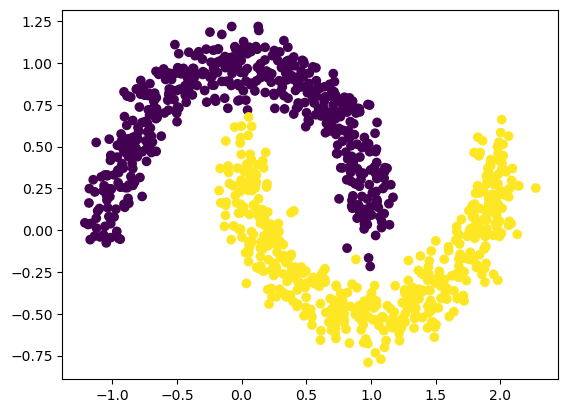

In [16]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label[:,None])
dataset['test_label'] = torch.from_numpy(test_label[:,None])

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])

In [17]:
model = KAN(width=[2,1], grid=3, k=3)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

train loss: 1.60e-01 | test loss: 1.58e-01 | reg: 3.54e+00 : 100%|██| 20/20 [00:00<00:00, 29.06it/s]


(0.9990000128746033, 0.9990000128746033)

In [9]:
################################################
#Function Approximation
#############################################

/Users/yannick/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/1000], Train Loss: 5903.9619, Test Loss: 5827.2466
Epoch [20/1000], Train Loss: 5646.6802, Test Loss: 5537.3530
Epoch [30/1000], Train Loss: 5217.9067, Test Loss: 5058.7363
Epoch [40/1000], Train Loss: 4607.9214, Test Loss: 4393.6064
Epoch [50/1000], Train Loss: 4008.1365, Test Loss: 3780.1680
Epoch [60/1000], Train Loss: 3830.0935, Test Loss: 3644.3130
Epoch [70/1000], Train Loss: 3813.6050, Test Loss: 3613.8066
Epoch [80/1000], Train Loss: 3742.2024, Test Loss: 3546.3618
Epoch [90/1000], Train Loss: 3707.8279, Test Loss: 3509.0374
Epoch [100/1000], Train Loss: 3664.9700, Test Loss: 3467.9646
Epoch [110/1000], Train Loss: 3625.9045, Test Loss: 3428.8997
Epoch [120/1000], Train Loss: 3584.0222, Test Loss: 3381.4756
Epoch [130/1000], Train Loss: 3538.5571, Test Loss: 3329.9475
Epoch [140/1000], Train Loss: 3487.3416, Test Loss: 3271.5295
Epoch [150/1000], Train Loss: 3425.0613, Test Loss: 3194.7886
Epoch [160/1000], Train Loss: 3346.5193, Test Loss: 3109.2456
Epoch [170/1000],

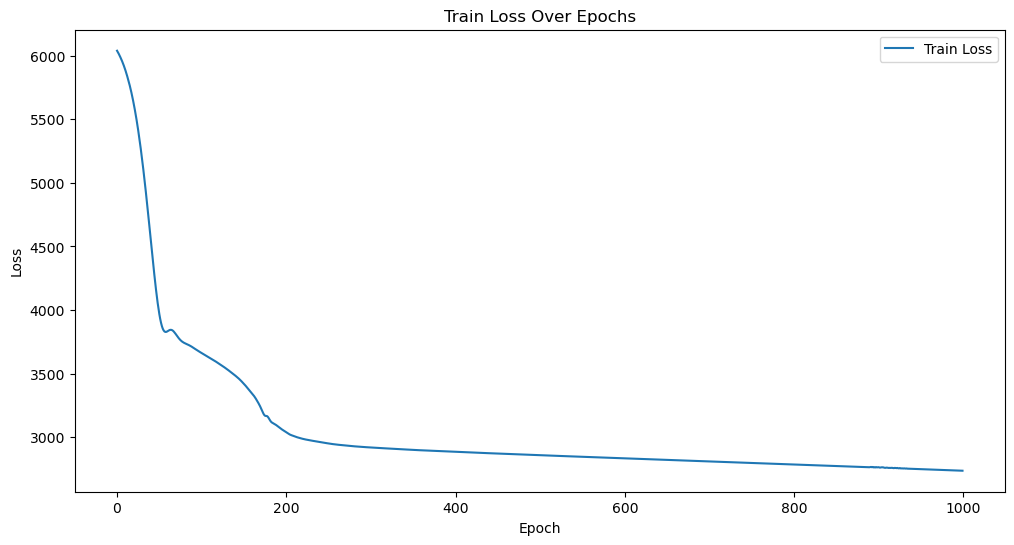

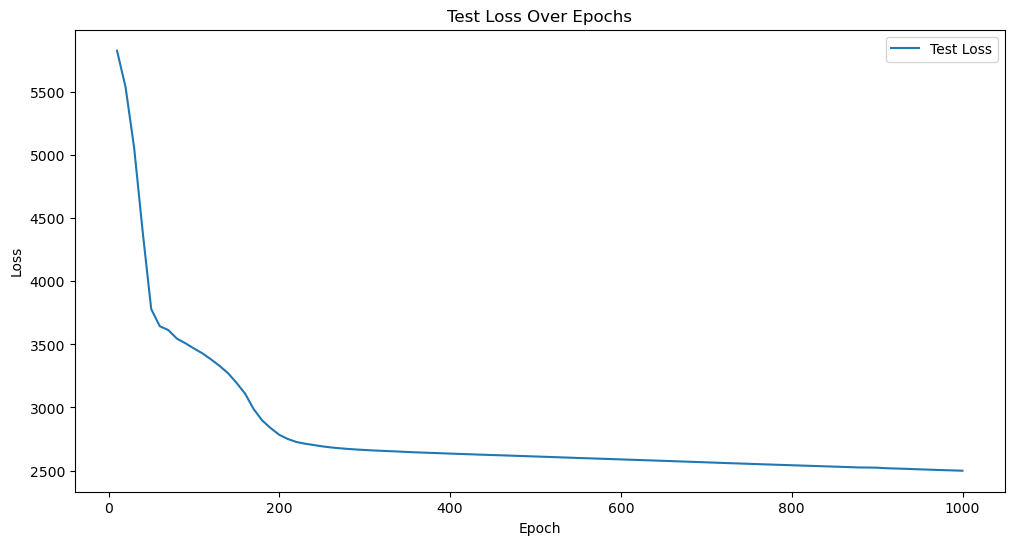

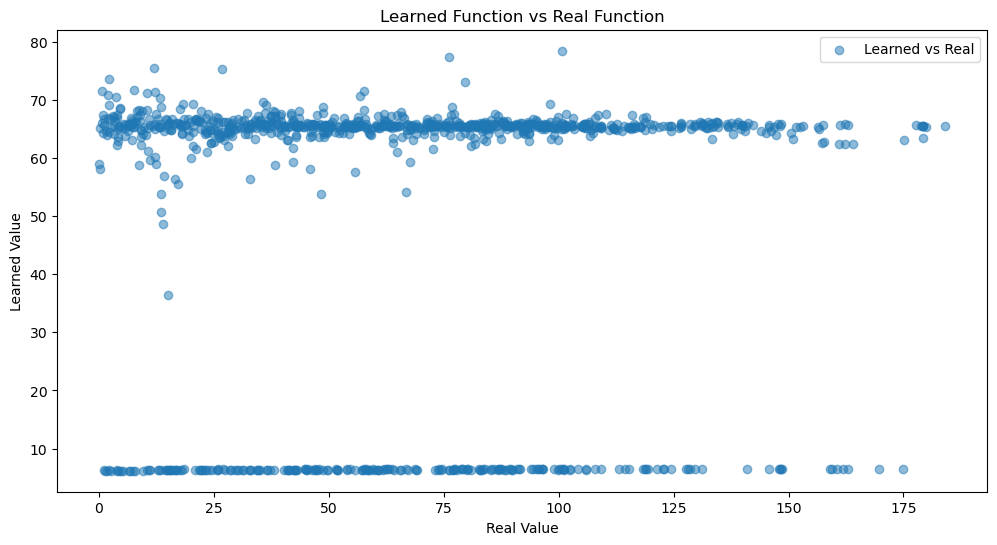

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + len(control_points) + 1
    if grid_points < min_grid_points:
        raise ValueError("Number of grid points must be at least", min_grid_points)
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = self.scale_factor * scaled_input + self.weight * basis_sum  # Use w and w_s without sigmoid constraints
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1_x1 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines for x1
        self.control_points_layer1_x2 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines for x2
        self.control_points_layer2 = nn.ParameterList([nn.Parameter(torch.empty(10).uniform_(-1, 1)) for _ in range(5)])  # 5 B-splines in second layer
        self.control_points_layer3 = nn.Parameter(torch.empty(10).uniform_(-1, 1))  # 1 B-spline in third layer

        self.bspline_layers_x1 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x1])
        self.bspline_layers_x2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1_x2])
        self.bspline_layers_layer2 = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer2])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer3, degree, grid_points)

        self.output_layer = nn.Linear(1, 1)  # Output layer for regression

    def forward(self, x1, x2):
        # Pass through first layer (10 B-splines, 5 for each input)
        y1 = [layer(x1) for layer in self.bspline_layers_x1]
        y2 = [layer(x2) for layer in self.bspline_layers_x2]
        
        # Pass through second layer (5 B-splines, sum of corresponding outputs from y1 and y2)
        y = [layer(y1[i] + y2[i]) for i, layer in enumerate(self.bspline_layers_layer2)]
        
        # Pass through third layer (sum of second layer outputs)
        y_sum = sum(y)
        bspline_output = self.final_bspline_layer(y_sum)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for regression
        return output

def train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000):
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X_train[:, 0]
        x2 = X_train[:, 1]
        target_train = y_train.squeeze()

        outputs_train = model(x1, x2)
        loss_train = criterion(outputs_train, target_train)
        
        loss_train.backward()
        optimizer.step()
        
        train_losses.append(loss_train.item())

        if (epoch+1) % 10 == 0:
            loss_test = test_model(model, X_test, y_test, criterion)
            test_losses.append(loss_test)
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test:.4f}')

    return train_losses, test_losses

def test_model(model, X, y, criterion):
    model.eval()
    with torch.no_grad():
        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        return loss.item()

# Create dataset for f(x, y) = x^2 + y^2
def create_dataset(n_samples=1000):
    x = np.random.uniform(-10, 10, n_samples)
    y = np.random.uniform(-10, 10, n_samples)
    z = x**2 + y**2
    return torch.tensor(np.vstack((x, y)).T, dtype=torch.float32), torch.tensor(z[:, None], dtype=torch.float32)

X_train, y_train = create_dataset(1000)
X_test, y_test = create_dataset(1000)

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get losses
train_losses, test_losses = train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, num_epochs=1000)

# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()
plt.savefig('train_loss_over_epochs.png', dpi=600)
plt.show()

# Plot the test loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(range(10, 1001, 10), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss Over Epochs')
plt.legend()
plt.savefig('test_loss_over_epochs.png', dpi=600)
plt.show()

# Plot the real function vs the learned function
def plot_learned_vs_real(model, X_test):
    x1 = X_test[:, 0]
    x2 = X_test[:, 1]
    y_real = x1**2 + x2**2

    model.eval()
    with torch.no_grad():
        y_learned = model(x1, x2).squeeze()

    plt.figure(figsize=(12, 6))
    plt.scatter(y_real.numpy(), y_learned.numpy(), label='Learned vs Real', alpha=0.5)
    plt.xlabel('Real Value')
    plt.ylabel('Learned Value')
    plt.title('Learned Function vs Real Function')
    plt.legend()
    plt.savefig('learned_vs_real_function.png', dpi=600)
    plt.show()

plot_learned_vs_real(model, X_test)


In [24]:
#######################################

In [26]:
from kan import *

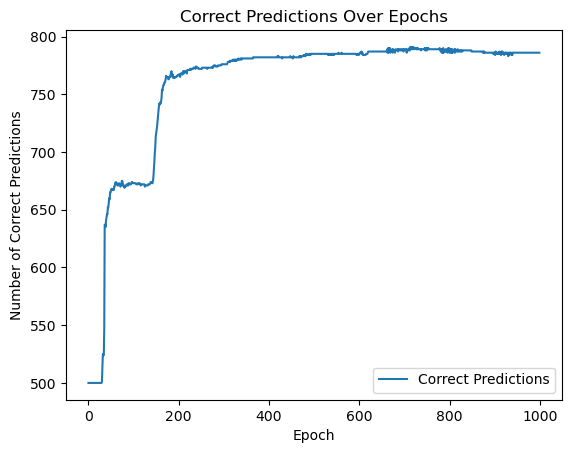

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = self.weight * scaled_input + self.scale_factor * basis_sum  # w * SiLU(x) + w_s * Bspline(x)
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(2)])  # 2 B-splines
        self.control_points_layer2 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline

        self.bspline_layers = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer2, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Combine inputs
        x = (x1 + x2) / 2
        
        # Pass through first layer (2 B-splines)
        y = sum([layer(x) for layer in self.bspline_layers])
        
        # Pass through second layer (1 B-spline)
        bspline_output = self.final_bspline_layer(y)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)

        if (epoch+1) % 10 == 0:
            pass
    return correct_predictions

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 14
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()





In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    min_grid_points = degree + 1  # Allow minimum grid points to be degree + 1
    if grid_points < min_grid_points:
        raise ValueError(f"Number of grid points must be at least {min_grid_points}")
    knots = np.linspace(0, 2, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = self.weight * scaled_input + self.scale_factor * basis_sum  # w * SiLU(x) + w_s * Bspline(x)
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(2)])  # 2 B-splines
        self.control_points_layer2 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline

        self.bspline_layers = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer2, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Combine inputs
        x = (x1 + x2) / 2
        
        # Pass through first layer (2 B-splines)
        y = sum([layer(x) for layer in self.bspline_layers])
        
        # Pass through second layer (1 B-spline)
        bspline_output = self.final_bspline_layer(y)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    train_losses = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)
        train_losses.append(loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
    return correct_predictions, train_losses

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 4  # Minimum grid points for k=3 is set to 3
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions, train_losses = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.figure(figsize=(12, 6))
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()
plt.savefig('train_loss_over_epochs.png', dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    X_test = dataset['test_input']
    y_test = dataset['test_label']
    x1 = X_test[:, 0]
    x2 = X_test[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test.squeeze()).sum().item()
    accuracy = correct / len(y_test) * 100
    print(f'Test Accuracy: {accuracy:.2f}%')


IndexError: index 4 is out of bounds for dimension 0 with size 4

Epoch [10/1000], Loss: 0.7841, Correct Predictions: 592/1000
Epoch [20/1000], Loss: 0.7228, Correct Predictions: 437/1000
Epoch [30/1000], Loss: 0.7078, Correct Predictions: 444/1000
Epoch [40/1000], Loss: 0.6921, Correct Predictions: 433/1000
Epoch [50/1000], Loss: 0.6857, Correct Predictions: 428/1000
Epoch [60/1000], Loss: 0.6825, Correct Predictions: 442/1000
Epoch [70/1000], Loss: 0.6808, Correct Predictions: 444/1000
Epoch [80/1000], Loss: 0.6800, Correct Predictions: 439/1000
Epoch [90/1000], Loss: 0.6794, Correct Predictions: 444/1000
Epoch [100/1000], Loss: 0.6789, Correct Predictions: 443/1000
Epoch [110/1000], Loss: 0.6784, Correct Predictions: 443/1000
Epoch [120/1000], Loss: 0.6778, Correct Predictions: 452/1000
Epoch [130/1000], Loss: 0.6772, Correct Predictions: 452/1000
Epoch [140/1000], Loss: 0.6765, Correct Predictions: 451/1000
Epoch [150/1000], Loss: 0.6758, Correct Predictions: 452/1000
Epoch [160/1000], Loss: 0.6750, Correct Predictions: 455/1000
Epoch [170/1000],

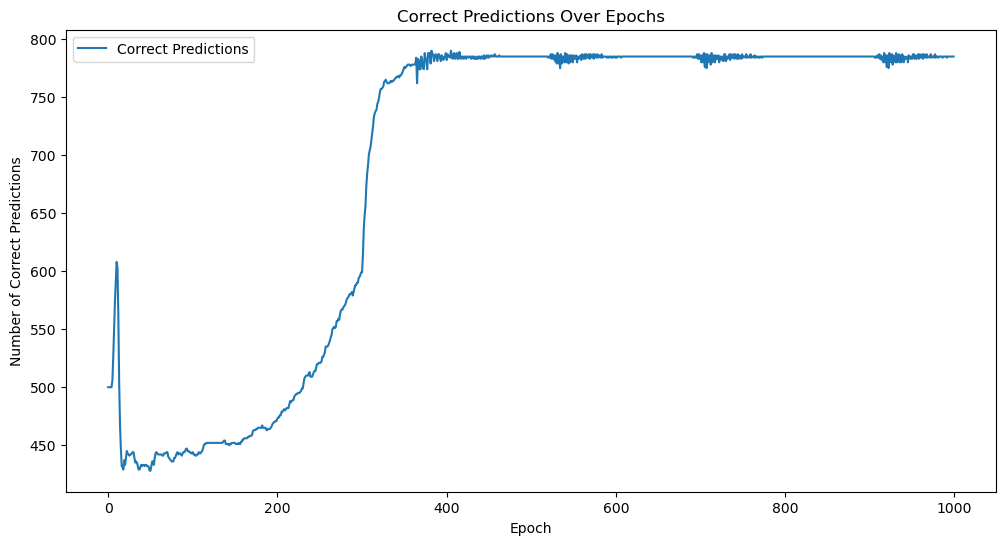

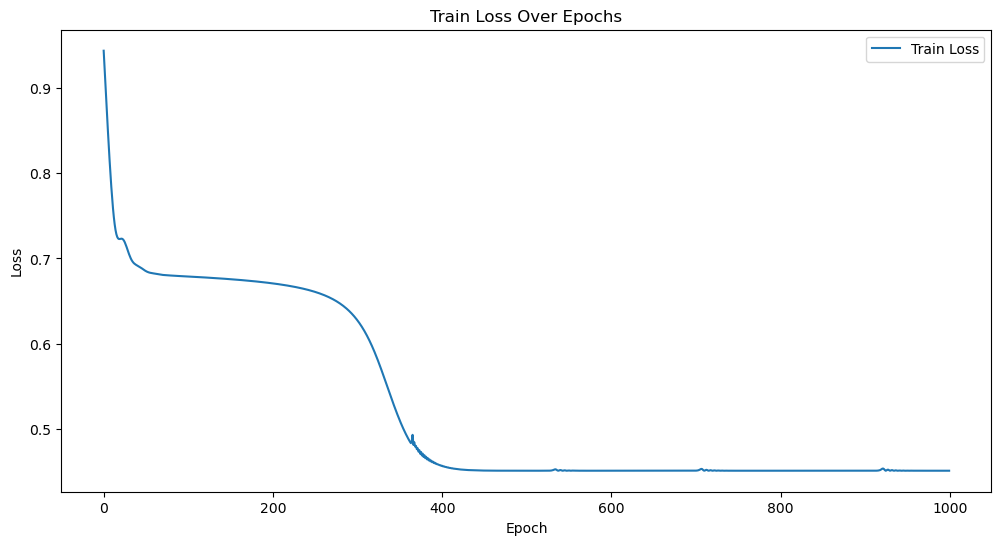

Test Accuracy: 77.20%


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(x, degree, i, t):
    if degree == 0:
        return torch.where((t[i] <= x) & (x < t[i + 1]), torch.tensor(1.0, dtype=torch.float32), torch.tensor(0.0, dtype=torch.float32))
    else:
        denom1 = t[i + degree] - t[i]
        denom2 = t[i + degree + 1] - t[i + 1]

        coeff1 = (x - t[i]) / denom1 if denom1 != 0 else torch.tensor(0.0, dtype=torch.float32)
        coeff2 = (t[i + degree + 1] - x) / denom2 if denom2 != 0 else torch.tensor(0.0, dtype=torch.float32)
        return coeff1 * cox_de_boor(x, degree - 1, i, t) + coeff2 * cox_de_boor(x, degree - 1, i + 1, t)

def generate_knot_vector_uniform(grid_points, control_points, degree):
    #min_grid_points = degree + len(control_points) + 1  # Ensure sufficient knot vector length
    #if grid_points < min_grid_points:
    #    raise ValueError(f"Number of grid points must be at least {min_grid_points}")
    knots = np.linspace(-10, 10, grid_points)
    return torch.tensor(knots, dtype=torch.float32)

class BSplineLayer(nn.Module):
    def __init__(self, control_points, degree, grid_points):
        super(BSplineLayer, self).__init__()
        self.control_points = nn.Parameter(control_points)
        self.degree = degree
        self.grid_points = grid_points
        self.knots = generate_knot_vector_uniform(grid_points, control_points, degree)
        self.scale_factor = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.weight = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.activation = nn.SiLU()

    def forward(self, x):
        basis_sum = sum(self.control_points[i] * cox_de_boor(x, self.degree, i, self.knots) for i in range(len(self.control_points)))
        scaled_input = self.activation(x)
        output = self.weight * scaled_input + self.scale_factor * basis_sum  # w * SiLU(x) + w_s * Bspline(x)
        return output

class KAN(nn.Module):
    def __init__(self, degree, grid_points):
        super(KAN, self).__init__()
        self.control_points_layer1 = nn.ParameterList([nn.Parameter(torch.randn(10, dtype=torch.float32)) for _ in range(2)])  # 2 B-splines
        self.control_points_layer2 = nn.Parameter(torch.randn(10, dtype=torch.float32))  # 1 B-spline

        self.bspline_layers = nn.ModuleList([BSplineLayer(cp, degree, grid_points) for cp in self.control_points_layer1])
        self.final_bspline_layer = BSplineLayer(self.control_points_layer2, degree, grid_points)

        self.output_layer = nn.Linear(1, 2)  # Output layer for classification

    def forward(self, x1, x2):
        # Combine inputs
        x = (x1 + x2) / 2
        
        # Pass through first layer (2 B-splines)
        y = sum([layer(x) for layer in self.bspline_layers])
        
        # Pass through second layer (1 B-spline)
        bspline_output = self.final_bspline_layer(y)
        
        # Output layer
        output = self.output_layer(bspline_output.unsqueeze(-1))  # Ensure output is 2D for classification
        return output

def train_model(model, X, y, criterion, optimizer, num_epochs=1000):
    correct_predictions = []
    train_losses = []
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()

        x1 = X[:, 0]
        x2 = X[:, 1]
        target = y.squeeze()

        outputs = model(x1, x2)
        loss = criterion(outputs, target)
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == target).sum().item()
        correct_predictions.append(correct)
        train_losses.append(loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Correct Predictions: {correct}/{len(y)}')
    return correct_predictions, train_losses

# Example dataset
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:, None]).long()
dataset['test_label'] = torch.from_numpy(test_label[:, None]).long()

X = dataset['train_input']
y = dataset['train_label']

# Initialize model, criterion and optimizer
degree = 3
grid_points = 15  # Example with grid points set to 4
model = KAN(degree, grid_points)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model and get correct predictions
correct_predictions, train_losses = train_model(model, X, y, criterion, optimizer, num_epochs=1000)

# Plot the number of correct predictions over epochs
plt.figure(figsize=(12, 6))
plt.plot(correct_predictions, label='Correct Predictions')
plt.xlabel('Epoch')
plt.ylabel('Number of Correct Predictions')
plt.title('Correct Predictions Over Epochs')
plt.legend()
plt.savefig('correct_predictions_over_epochs.png', dpi=600)
plt.show()

# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()
plt.savefig('train_loss_over_epochs.png', dpi=600)
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    X_test = dataset['test_input']
    y_test = dataset['test_label']
    x1 = X_test[:, 0]
    x2 = X_test[:, 1]
    outputs = model(x1, x2)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test.squeeze()).sum().item()
    accuracy = correct / len(y_test) * 100
    print(f'Test Accuracy: {accuracy:.2f}%')


In [ ]:
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dtype = torch.get_default_dtype()
dataset['train_input'] = torch.from_numpy(train_input).type(dtype)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype)
dataset['train_label'] = torch.from_numpy(train_label[:,None]).type(dtype)
dataset['test_label'] = torch.from_numpy(test_label[:,None]).type(dtype)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])


In [ ]:
model = KAN(width=[2,1], grid=3, k=3)
print(model.grid.data)